### Adding libraries


In [87]:
import warnings
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

warnings.simplefilter('ignore', FutureWarning)

In [88]:
date_from = datetime.date(2013, 1, 1)
date_to = datetime.date(2023, 1, 5)
datafin = ['^BVSP', '^FTSE', '^GSPC', '^J580.JO','^HSI','^NSEI']
multiData = yf.download(datafin,start= date_from,end=date_to)['Adj Close']
df = multiData.copy()
df

[*********************100%***********************]  6 of 6 completed


,^BVSP,^FTSE,^GSPC,^HSI,^J580.JO,^NSEI
Date,,,,,,
2013-01-02,62550.0,6027.399902,1462.420044,23311.980469,29696.000000,5993.250000
2013-01-03,63312.0,6047.299805,1459.369995,23398.599609,29794.000000,6009.500000
2013-01-04,62523.0,6089.799805,1466.469971,23331.089844,29902.000000,6016.149902
2013-01-07,61933.0,6064.600098,1461.890015,23329.750000,30068.000000,5988.399902
2013-01-08,61128.0,6053.600098,1457.150024,23111.189453,30133.000000,6001.700195
...,...,...,...,...,...,...
2022-12-29,110031.0,7512.700195,3849.280029,19741.140625,38360.890625,18191.000000
2022-12-30,NaN,7451.700195,3839.500000,19781.410156,38338.468750,18105.300781
2023-01-02,106376.0,NaN,NaN,NaN,NaN,18197.449219


In [89]:
TRADING_DAYS = 252
returns_portfolio = np.log(df/df.shift(1))
returns_portfolio.fillna(0, inplace=True)
volatility_portfolio = returns_portfolio.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
volatility_portfolio.tail()

,^BVSP,^FTSE,^GSPC,^HSI,^J580.JO,^NSEI
Date,,,,,,
2022-12-29,0.201000,0.161974,0.238301,0.309564,0.208782,0.166098
2022-12-30,0.200254,0.162063,0.238104,0.309578,0.208661,0.166153
2023-01-02,0.199464,0.161863,0.238078,0.308251,0.208569,0.166012
2023-01-03,0.200604,0.161854,0.237688,0.308245,0.208382,0.166005
2023-01-04,0.200485,0.161884,0.237825,0.309979,0.208398,0.166351


In [90]:
daily_pct_change = df.pct_change()
daily_pct_change.fillna(0, inplace=True)
cumprod_daily_pct_change = (1 + daily_pct_change).cumprod()
cumprod_daily_pct_change.tail()

,^BVSP,^FTSE,^GSPC,^HSI,^J580.JO,^NSEI
Date,,,,,,
2022-12-29,1.759089,1.246425,2.632130,0.846824,1.291786,3.035248
2022-12-30,1.759089,1.236304,2.625443,0.848551,1.291031,3.020949
2023-01-02,1.700655,1.236304,2.625443,0.848551,1.291031,3.036324
2023-01-03,1.665324,1.253293,2.614939,0.864160,1.301971,3.042181
2023-01-04,1.683997,1.258453,2.634653,0.891950,1.306935,3.010545


Text(0.5, 1.0, 'Indices Cumulative Returns')

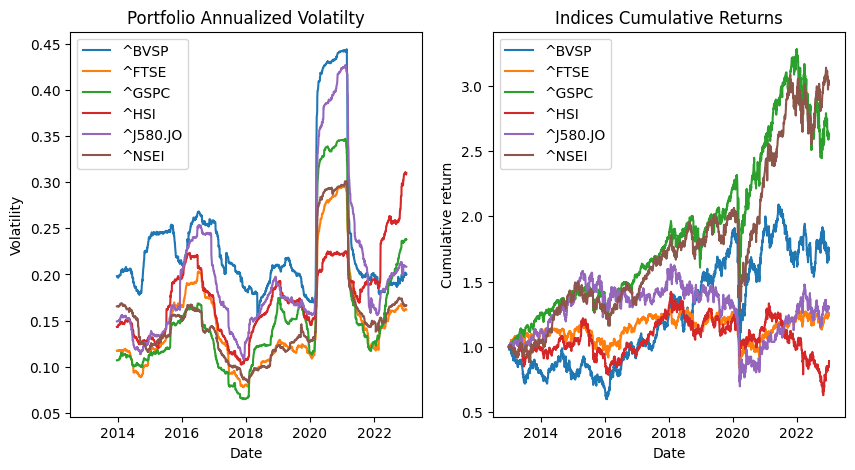

In [91]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))

sns.lineplot(data=volatility_portfolio, dashes=False, ax=axes[0])
axes[0].set_ylabel('Volatility')
axes[0].set_title('Portfolio Annualized Volatilty')


sns.lineplot(data=cumprod_daily_pct_change, dashes=False, ax=axes[1])
axes[1].set_ylabel('Cumulative return')
axes[1].set_title('Indices Cumulative Returns')



In [92]:
df=df.dropna()

In [93]:
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]
df1=pd.DataFrame()
df1['bvsp_rsi_14'] = get_rsi(df['^BVSP'], 14)
df1['ftse_rsi_14'] = get_rsi(df['^FTSE'], 14)
df1['gspc_rsi_14'] = get_rsi(df['^GSPC'], 14)
df1['hsi_rsi_14'] = get_rsi(df['^HSI'], 14)
df1['j580.jo_rsi_14'] = get_rsi(df['^J580.JO'], 14)
df1['nsei_rsi_14'] = get_rsi(df['^NSEI'], 14)
df1 = df1.dropna()
df1

,bvsp_rsi_14,ftse_rsi_14,gspc_rsi_14,hsi_rsi_14,j580.jo_rsi_14,nsei_rsi_14
Date,,,,,,
2013-01-08,80.773033,88.303661,34.869283,77.740033,100.000000,88.646082
2013-01-09,81.617352,89.961446,47.364164,79.624838,100.000000,77.534925
2013-01-10,81.806222,90.055676,66.949205,81.733841,92.339140,76.559634
2013-01-11,80.184148,90.728530,66.780581,76.098624,93.223841,70.727195
2013-01-14,81.461410,86.435620,63.411716,78.711808,93.792214,78.219738
...,...,...,...,...,...,...
2022-12-23,53.830317,55.252212,43.989178,60.800243,53.880069,31.694263
2022-12-28,55.421076,57.381655,39.706849,63.634871,51.048422,44.231303
2022-12-29,54.646132,58.736102,45.800426,61.177318,47.659544,46.524769


Text(0.5, 1.0, 'RSI OF EQUITY')

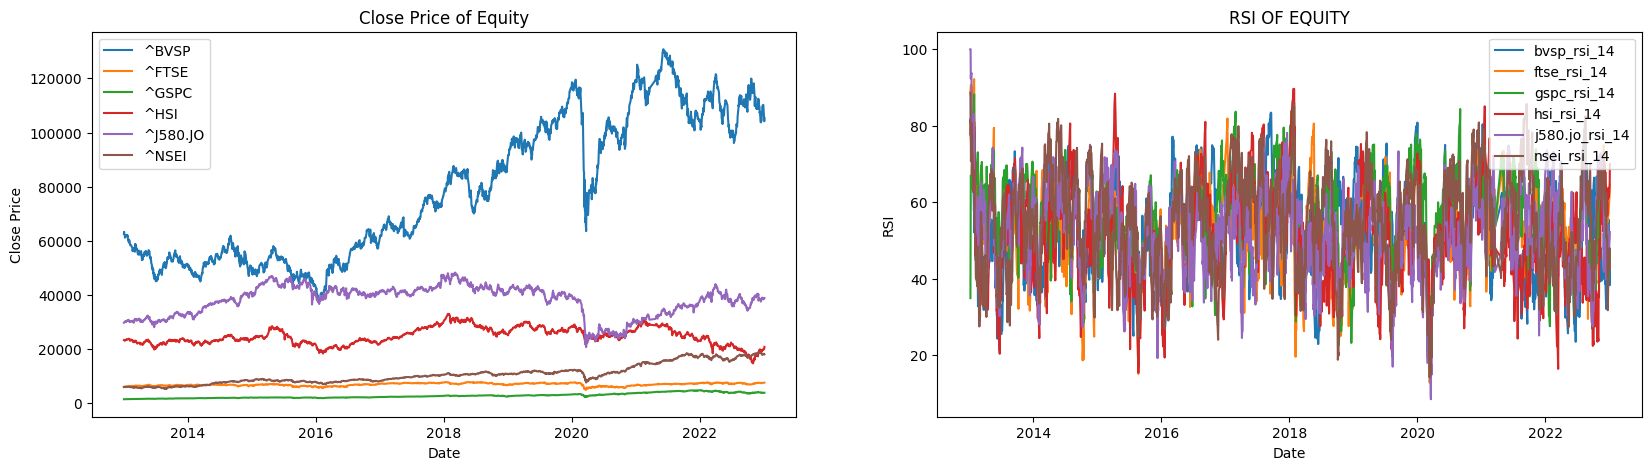

In [94]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,5))

sns.lineplot(data=df, dashes=False, ax=axes[0])
axes[0].set_ylabel('Close Price')
axes[0].set_title('Close Price of Equity')


sns.lineplot(data=df1, dashes=False, ax=axes[1])
axes[1].set_ylabel('RSI')
axes[1].set_title('RSI OF EQUITY')

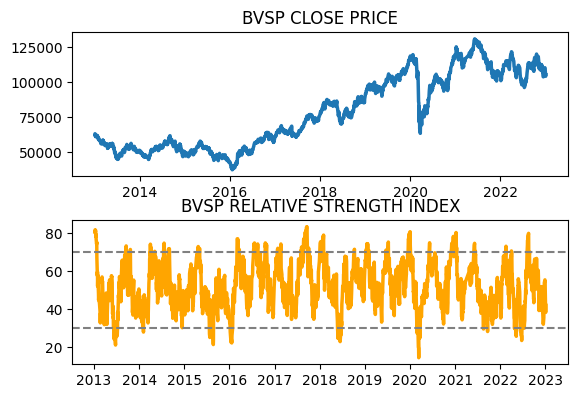

In [95]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(df['^BVSP'], linewidth = 2.5)
ax1.set_title('BVSP CLOSE PRICE')
ax2.plot(df1['bvsp_rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('BVSP RELATIVE STRENGTH INDEX')
plt.show()

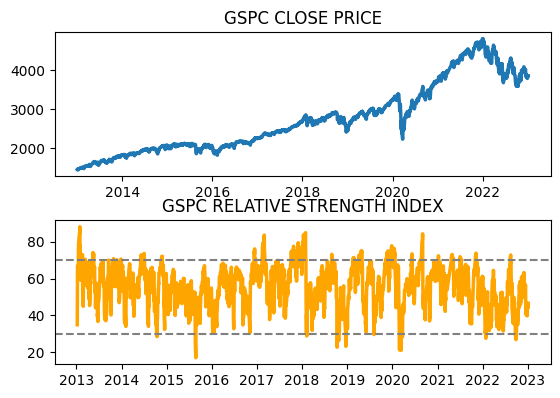

In [96]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(df['^GSPC'], linewidth = 2.5)
ax1.set_title('GSPC CLOSE PRICE')
ax2.plot(df1['gspc_rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('GSPC RELATIVE STRENGTH INDEX')
plt.show()

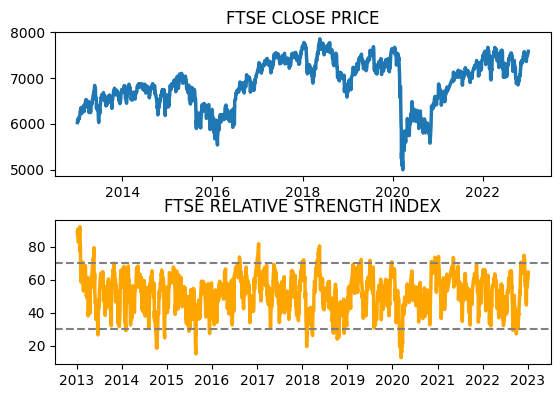

In [97]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(df['^FTSE'], linewidth = 2.5)
ax1.set_title('FTSE CLOSE PRICE')
ax2.plot(df1['ftse_rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('FTSE RELATIVE STRENGTH INDEX')
plt.show()

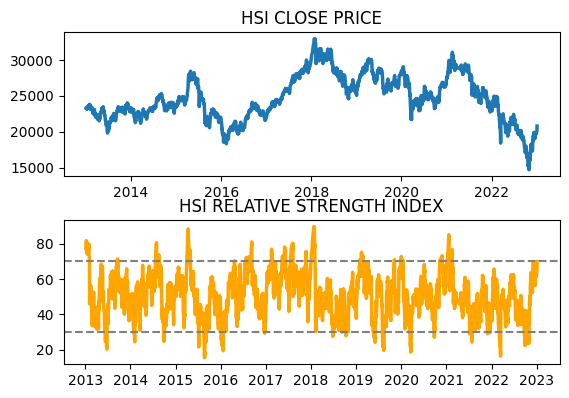

In [98]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(df['^HSI'], linewidth = 2.5)
ax1.set_title('HSI CLOSE PRICE')
ax2.plot(df1['hsi_rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('HSI RELATIVE STRENGTH INDEX')
plt.show()

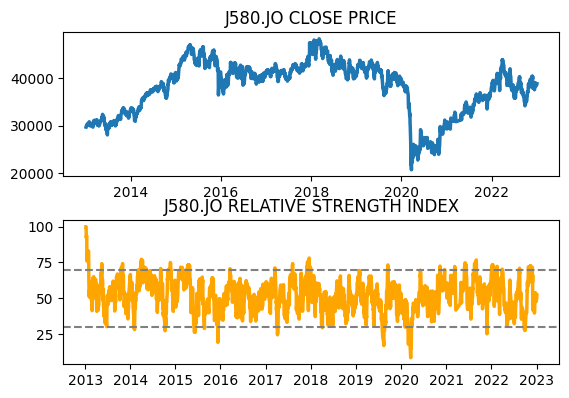

In [99]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(df['^J580.JO'], linewidth = 2.5)
ax1.set_title('J580.JO CLOSE PRICE')
ax2.plot(df1['j580.jo_rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('J580.JO RELATIVE STRENGTH INDEX')
plt.show()

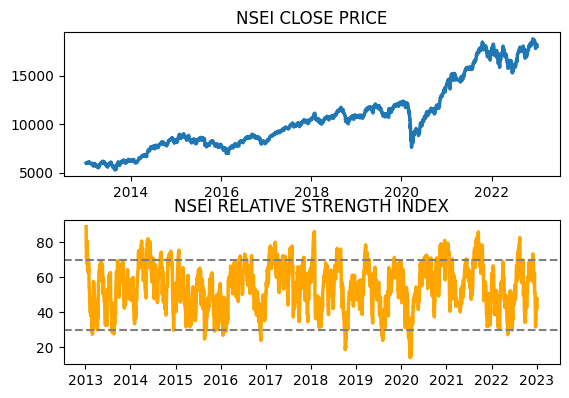

In [100]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(df['^NSEI'], linewidth = 2.5)
ax1.set_title('NSEI CLOSE PRICE')
ax2.plot(df1['nsei_rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('NSEI RELATIVE STRENGTH INDEX')
plt.show()

In [101]:

SMA_BVSP_20= df["^BVSP"].rolling(20).mean()
SMA_BVSP_100= df["^BVSP"].rolling(100).mean()
SMA_FTSE_20= df["^FTSE"].rolling(20).mean()
SMA_FTSE_100= df["^FTSE"].rolling(100).mean()
SMA_GSPC_20= df["^GSPC"].rolling(20).mean()
SMA_GSPC_100= df["^GSPC"].rolling(100).mean()
SMA_HSI_20= df["^HSI"].rolling(20).mean()
SMA_HSI_100= df["^HSI"].rolling(100).mean()
SMA_J580JO_20= df["^J580.JO"].rolling(20).mean()
SMA_J580JO_100= df["^J580.JO"].rolling(100).mean()
SMA_NSEI_20= df["^NSEI"].rolling(20).mean()
SMA_NSEI_100= df["^NSEI"].rolling(100).mean()

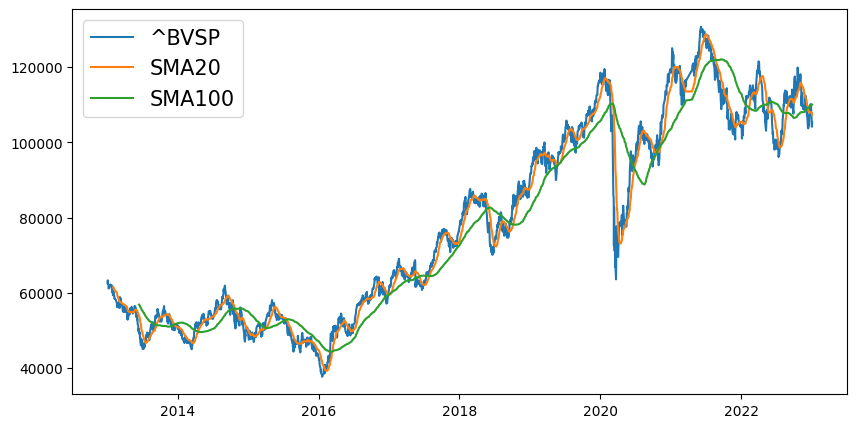

In [102]:
plt.figure(figsize=(10, 5))
plt.plot(df['^BVSP'], label='^BVSP')
plt.plot(SMA_BVSP_20, label='SMA20')
plt.plot(SMA_BVSP_100, label='SMA100')
plt.legend(loc='upper left', fontsize=15)

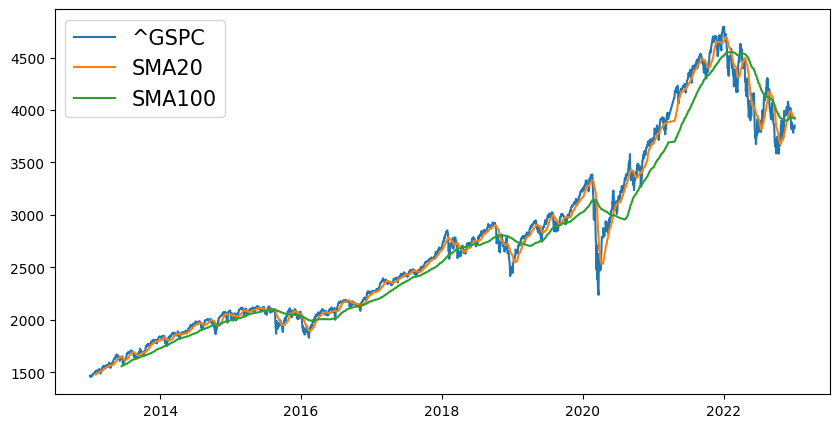

In [103]:
plt.figure(figsize=(10, 5))
plt.plot(df['^GSPC'], label='^GSPC')
plt.plot(SMA_GSPC_20, label='SMA20')
plt.plot(SMA_GSPC_100, label='SMA100')
plt.legend(loc='upper left', fontsize=15)

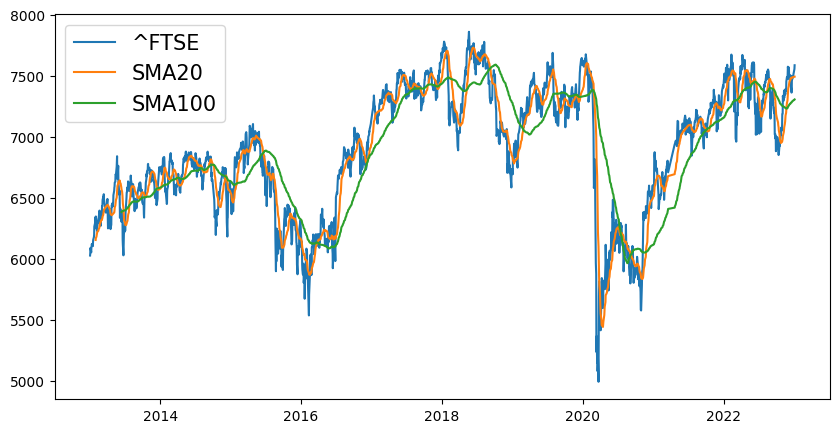

In [104]:
plt.figure(figsize=(10, 5))
plt.plot(df['^FTSE'], label='^FTSE')
plt.plot(SMA_FTSE_20, label='SMA20')
plt.plot(SMA_FTSE_100, label='SMA100')
plt.legend(loc='upper left', fontsize=15)

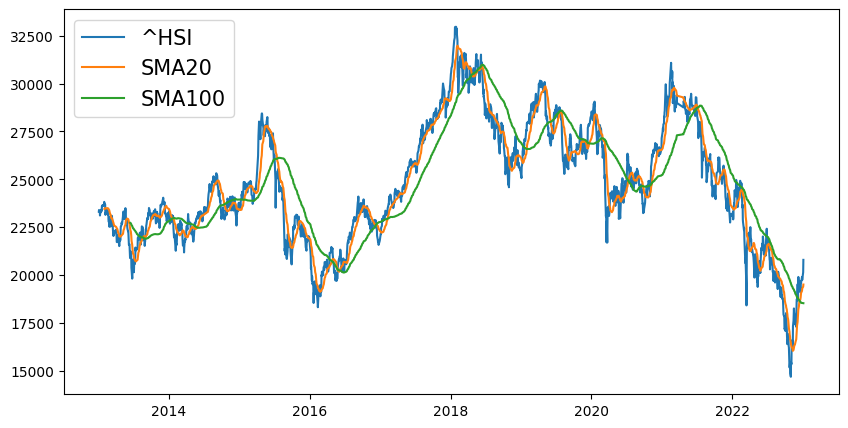

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(df['^HSI'], label='^HSI')
plt.plot(SMA_HSI_20, label='SMA20')
plt.plot(SMA_HSI_100, label='SMA100')
plt.legend(loc='upper left', fontsize=15)

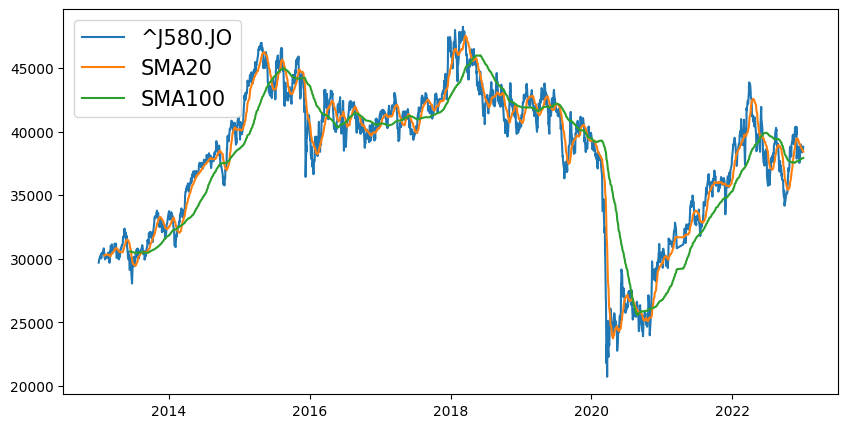

In [106]:
plt.figure(figsize=(10, 5))
plt.plot(df['^J580.JO'], label='^J580.JO')
plt.plot(SMA_J580JO_20, label='SMA20')
plt.plot(SMA_J580JO_100, label='SMA100')
plt.legend(loc='upper left', fontsize=15)

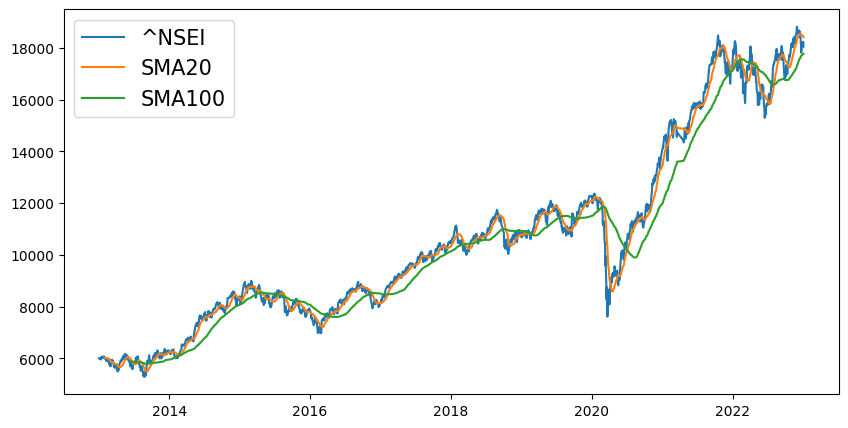

In [107]:
plt.figure(figsize=(10, 5))
plt.plot(df['^NSEI'], label='^NSEI')
plt.plot(SMA_NSEI_20, label='SMA20')
plt.plot(SMA_NSEI_100, label='SMA100')
plt.legend(loc='upper left', fontsize=15)

In [108]:
EMA_BVSP_20 = df['^BVSP'].ewm(span=20, adjust=False).mean()
EMA_BVSP_100 = df['^BVSP'].ewm(span=100, adjust=False).mean()
EMA_GSPC_20 = df['^GSPC'].ewm(span=20, adjust=False).mean()
EMA_GSPC_100 = df['^GSPC'].ewm(span=100, adjust=False).mean()
EMA_FTSE_20 = df['^FTSE'].ewm(span=20, adjust=False).mean()
EMA_FTSE_100 = df['^FTSE'].ewm(span=100, adjust=False).mean()
EMA_HSI_20 = df['^HSI'].ewm(span=20, adjust=False).mean()
EMA_HSI_100 = df['^HSI'].ewm(span=100, adjust=False).mean()
EMA_J580JO_20 = df['^J580.JO'].ewm(span=20, adjust=False).mean()
EMA_J580JO_100 = df['^J580.JO'].ewm(span=100, adjust=False).mean()
EMA_NSEI_20 = df['^NSEI'].ewm(span=20, adjust=False).mean()
EMA_NSEI_100 = df['^NSEI'].ewm(span=100, adjust=False).mean()


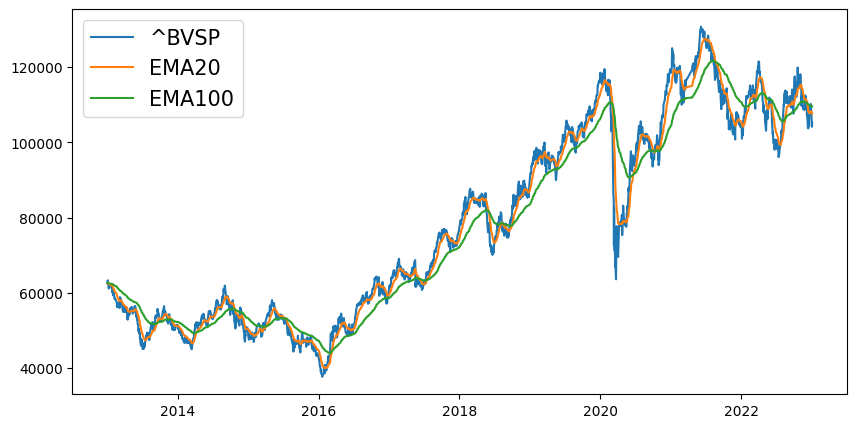

In [109]:
plt.figure(figsize=(10, 5))
plt.plot(df['^BVSP'], label='^BVSP')
plt.plot(EMA_BVSP_20, label='EMA20')
plt.plot(EMA_BVSP_100, label='EMA100')
plt.legend(loc='upper left', fontsize=15)

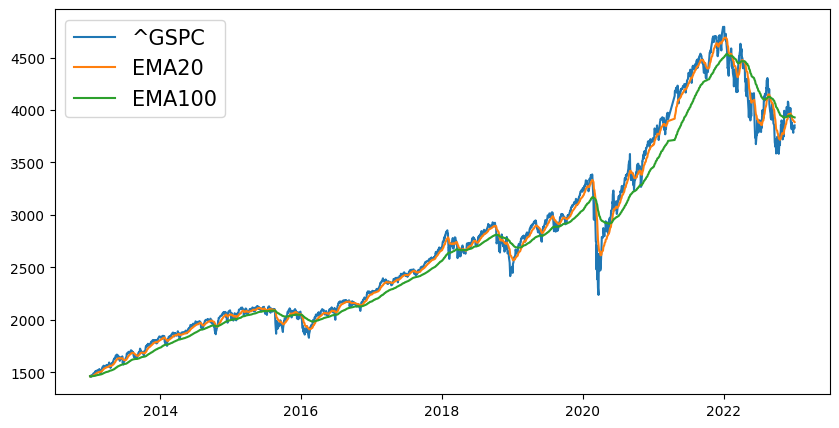

In [110]:
plt.figure(figsize=(10, 5))
plt.plot(df['^GSPC'], label='^GSPC')
plt.plot(EMA_GSPC_20, label='EMA20')
plt.plot(EMA_GSPC_100, label='EMA100')
plt.legend(loc='upper left', fontsize=15)

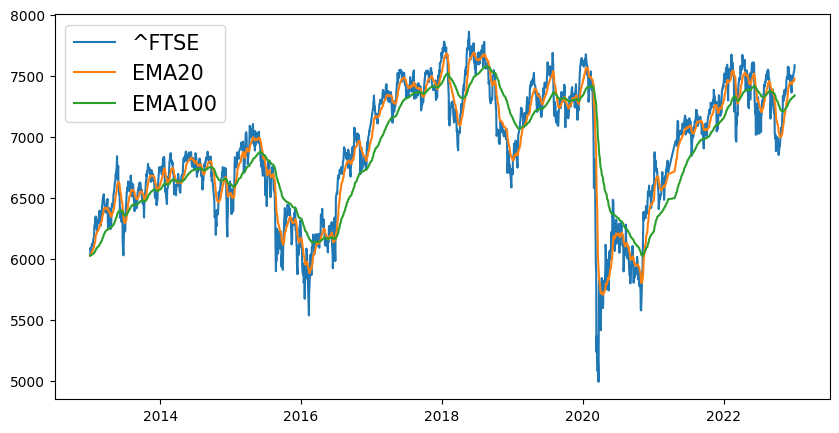

In [111]:
plt.figure(figsize=(10, 5))
plt.plot(df['^FTSE'], label='^FTSE')
plt.plot(EMA_FTSE_20, label='EMA20')
plt.plot(EMA_FTSE_100, label='EMA100')
plt.legend(loc='upper left', fontsize=15)

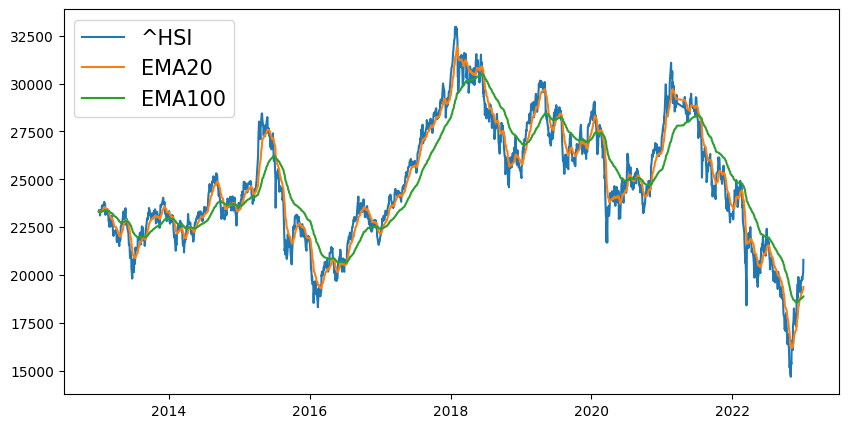

In [112]:
plt.figure(figsize=(10, 5))
plt.plot(df['^HSI'], label='^HSI')
plt.plot(EMA_HSI_20, label='EMA20')
plt.plot(EMA_HSI_100, label='EMA100')
plt.legend(loc='upper left', fontsize=15)

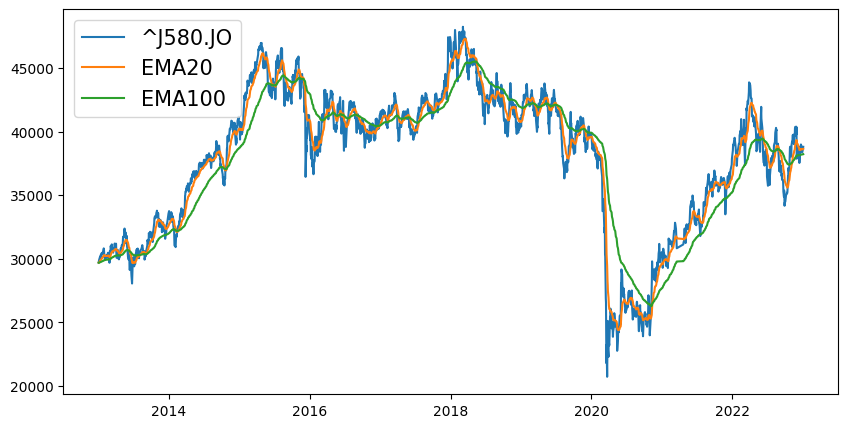

In [113]:
plt.figure(figsize=(10, 5))
plt.plot(df['^J580.JO'], label='^J580.JO')
plt.plot(EMA_J580JO_20, label='EMA20')
plt.plot(EMA_J580JO_100, label='EMA100')
plt.legend(loc='upper left', fontsize=15)

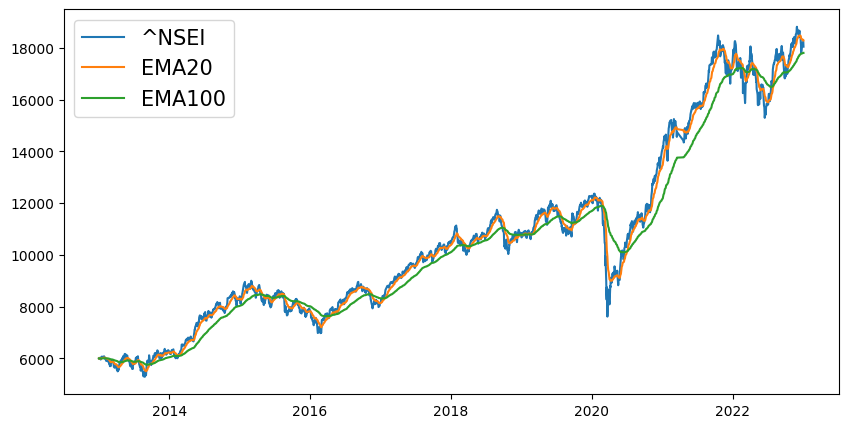

In [114]:
plt.figure(figsize=(10, 5))
plt.plot(df['^NSEI'], label='^NSEI')
plt.plot(EMA_NSEI_20, label='EMA20')
plt.plot(EMA_NSEI_100, label='EMA100')
plt.legend(loc='upper left', fontsize=15)

### Solution portfolio Analysis

Case 1: 90Equity + 10 bond

Case 2: 80Equity + 20 Bond

Case 3: 70 Equity + 30 Bond

Case 4: 60 Equity + 40 Bond

Case 5: 10 Equity + 90 Bond

Baseline : 100 Equity

### Portfolio - different sectors


In [ ]:
### code here

### Strategic Asset Allocation